<a href="https://colab.research.google.com/github/mralamdari/CV-Object-Detection-Projects/blob/main/SuperMan_Tracker_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 0: Essentials

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

##Download Some Video Clips of superman from this [Source](https://lyricslive24.com/superman-action-scene/)

In [ ]:
#Sample Videos
!wget https://lived2.lyricslive24.com/mp4regular/play/eDdtQk1BNzNoRlgxcjk4dFdzUTEwUT09/Superman-vs-Wonder-women-fight-scene-WhatsApp-status---justice-league--Superman.mp4
!wget https://lived2.lyricslive24.com/mp4regular/play/VVZjNlFoZEJOaHk2Y0U5cUFjNWVmUT09/SuperMan-Returns---WhatsApp-Status--Fight-Scene-.mp4
!wget https://vfss.b-cdn.net/library/S/Superman-Status-Video/Superman-attitude-full-screen-Shorts.mp4
!wget https://lived2.lyricslive24.com/mp4regular/play/T0dLK3ZOTXllVW5IMVJqMUtNZzNXZz09/Whatsapp-Superman-Status-Scene-Fight.mp4
!wget https://lived2.lyricslive24.com/mp4regular/play/S0J1WVVIV3A3R1ZJN3hZeDRMb3dNZz09/superman-amazing-fighting-scene-whatsApp-status-short.mp4
!wget https://lived2.lyricslive24.com/mp4regular/play/SXpXaGFxZy8wTlVxS3lGRUNvZldZUT09/Superman-Superman-whatsapp-Trinity-wonder-Batman-status-Batman-woman-scene-from-v.mp4

--2022-09-13 14:15:50--  https://lived2.lyricslive24.com/mp4regular/play/eDdtQk1BNzNoRlgxcjk4dFdzUTEwUT09/Superman-vs-Wonder-women-fight-scene-WhatsApp-status---justice-league--Superman.mp4
Resolving lived2.lyricslive24.com (lived2.lyricslive24.com)... 104.21.233.154, 104.21.233.153, 2606:4700:3038::6815:e999, ...
Connecting to lived2.lyricslive24.com (lived2.lyricslive24.com)|104.21.233.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2614403 (2.5M) [video/mp4]
Saving to: ‘Superman-vs-Wonder-women-fight-scene-WhatsApp-status---justice-league--Superman.mp4’

Superman-vs-Wonder- 100%[===================>]   2.49M  3.99MB/s    in 0.6s    

2022-09-13 14:15:51 (3.99 MB/s) - ‘Superman-vs-Wonder-women-fight-scene-WhatsApp-status---justice-league--Superman.mp4’ saved [2614403/2614403]

--2022-09-13 14:15:52--  https://lived2.lyricslive24.com/mp4regular/play/VVZjNlFoZEJOaHk2Y0U5cUFjNWVmUT09/SuperMan-Returns---WhatsApp-Status--Fight-Scene-.mp4
Resolving lived2.lyri

#Step 1: Darknet
To use yolo v2 model, you can get it easily from darknet or you can create a yolo v2 model from scratch

In [ ]:
#clone Darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Total 15490 (delta 0), reused 0 (delta 0), pack-reused 15490
Receiving objects: 100% (15490/15490), 14.08 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (10408/10408), done.


In [ ]:
# change makefile to have gpu and opencv enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
#Build(make) Darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

#Step 2: Dataset
you can get The Dataset From [Kaggle](https://www.kaggle.com/datasets/mralamdari/super-man-images-dataset)

In [ ]:
%cd /content/
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d mralamdari/super-man-images-dataset
!unzip \*.zip && rm *.zip

/content
 90% 57.0M/63.5M [00:01<00:00, 37.6MB/s]
100% 63.5M/63.5M [00:01<00:00, 36.6MB/s]
Archive:  super-man-images-dataset.zip
  inflating: SuperMan/1.jpg          
  inflating: SuperMan/1.txt          
  inflating: SuperMan/10.jpg         
  inflating: SuperMan/10.txt         
  inflating: SuperMan/100.jpg        
  inflating: SuperMan/100.txt        
  inflating: SuperMan/101.jpg        
  inflating: SuperMan/101.txt        
  inflating: SuperMan/102.jpg        
  inflating: SuperMan/102.txt        
  inflating: SuperMan/103.jpg        
  inflating: SuperMan/103.txt        
  inflating: SuperMan/104.jpg        
  inflating: SuperMan/104.txt        
  inflating: SuperMan/105.jpg        
  inflating: SuperMan/105.txt        
  inflating: SuperMan/106.jpg        
  inflating: SuperMan/106.txt        
  inflating: SuperMan/107.jpg        
  inflating: SuperMan/107.txt        
  inflating: SuperMan/108.jpg        
  inflating: SuperMan/108.txt        
  inflating: SuperMan/109.jpg     

1. Create obj.names
2. Move images to /content/darknet/
3. Create train.txt in /content/darknet/data/obj folder

In [ ]:
NUM_CLASSES = 1

os.rename('/content/SuperMan/classes.txt', '/content/darknet/data/obj.names')

os.rename('/content/SuperMan', '/content/darknet/data/obj/')

data_path='/content/darknet/data/'
with open(f'{data_path}train.txt', 'w+') as data_file:
      for image_file in os.listdir(f'{data_path}obj'):
          if image_file.endswith('.jpg'):
              data_file.write(f'{os.path.join(f"{data_path}obj", image_file)}\n')
data_file.close()    

Adjust yolov2-custom to trainning


In [ ]:
with open('/content/darknet/cfg/yolov3.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[2] = '#'+config_files[2] # batch=1
config_files[3] = '#'+config_files[3] # subdivisions=1

config_files[5] = config_files[5][2:]  # batch=64
config_files[6] = config_files[6][2:]  # subdivisions=16


num_classes=NUM_CLASSES
max_batches = 4000 if num_classes==1 else num_classes*2000
config_files[19] = f'max_batches={max_batches}\n'
config_files[21] = f'steps={max_batches*8//10},{max_batches*9//10}\n'


for i, j in enumerate(config_files):
    if j == '[yolo]\n':
        config_files[i-4] = f"filters={3*(5+num_classes)}\n" # convolutional filters
        config_files[i+3] = f"classes={num_classes}\n"       # yolo_classes
        config_files[i+8] = 'random=1\n'                     # yolo_random  0 or 1


with open('/content/darknet/cfg/yolov3-custom.cfg', 'w+') as f:
    f.writelines(config_files)

Create Obj.data

In [ ]:
with open('/content/darknet/data/obj.data', 'w+') as obj_data:
  odata = f"""classes={num_classes}
  train=/content/darknet/data/train.txt
  valid=/content/darknet/data/test.txt
  names=/content/darknet/data/obj.names
  backup=/content/drive/MyDrive/yolov3_backup
  """
  obj_data.write(odata)

os.makedirs('/content/drive/MyDrive/yolov3_backup', exist_ok=True)

#Step 3: Model

Get pre-trained weights for yolo

In [ ]:
%cd /content/darknet
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/darknet
--2022-09-13 07:33:16--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  45.8MB/s    in 3.7s    

2022-09-13 07:33:20 (41.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



### Train from scratch

#####Use this code, so colab won't crash after being inactive for more than 10 mins;

    function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-toolbar-button#connect").click() 
    }
    setInterval(ClickConnect,60000)

In [ ]:
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/darknet/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000008, iou_loss = 0.000000, total_loss = 0.000008 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
 total_bbox = 187288, rewritten_bbox = 0.114796 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.885573), count: 4, class_loss = 0.008657, iou_loss = 0.051652, total_loss = 0.060309 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 187292, rewritten_bbox = 0.114794 % 
v3 (m

In [ ]:
imShow('chart.png')

### Train from where you ceased training with saved weights.

In [ ]:
%cd /content/darknet
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolov3_backup/yolov3-custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.965297), count: 3, class_loss = 0.000015, iou_loss = 0.004195, total_loss = 0.004210 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000068, iou_loss = 0.000000, total_loss = 0.000068 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.002430, iou_loss = 0.000000, total_loss = 0.002430 
 total_bbox = 20063, rewritten_bbox = 0.104670 % 
]2;3633/4000: loss=0.0 hours left=0.8
 3633: 0.049250, 0.064901 avg loss, 0.000010 rate, 3.990980 seconds, 232512 images, 0.805798 hours left
Loaded: 0.000078 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.925482), count: 4, class_loss = 0.000719, iou_loss = 0.010183, total_loss = 0.010902 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.0

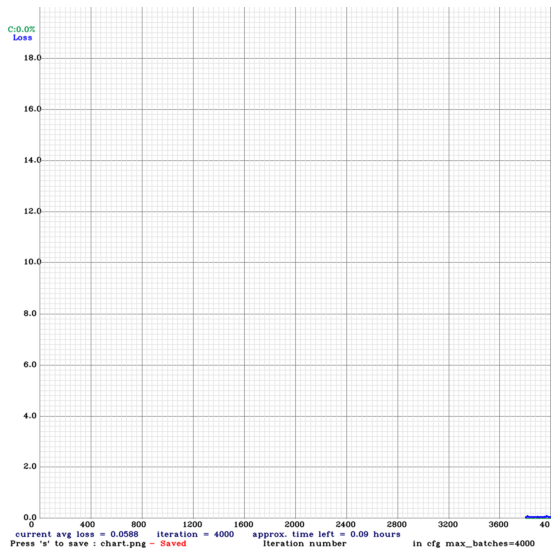

In [ ]:
imShow('chart.png')
fdkdfkdfdlldfekjhjnjmb
sdsllsdjjjhdslsdlsdsad
sdllsw03434sdlsdldssdl

Adjust yolov2-custom.cfg for testing


In [ ]:
with open('/content/darknet/cfg/yolov3-custom.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[5] = '#'+config_files[5] # batch=64
config_files[6] = '#'+config_files[6] # subdivisions=16

config_files[2] = config_files[2][2:]  # batch=1
config_files[3] = config_files[3][2:]  # subdivisions=1

with open('/content/darknet/cfg/yolov3-custom.cfg', 'w+') as f:
    f.writelines(config_files)

##Predict 

###Image Prediction

In [ ]:
%cd /content/darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolov3_backup/yolov3-custom_last.weights /content/darknet/data/obj/460.jpg -thresh 0.8 -dont_show

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
batch: Using default '1'
subdivisions: Using default '1'
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x

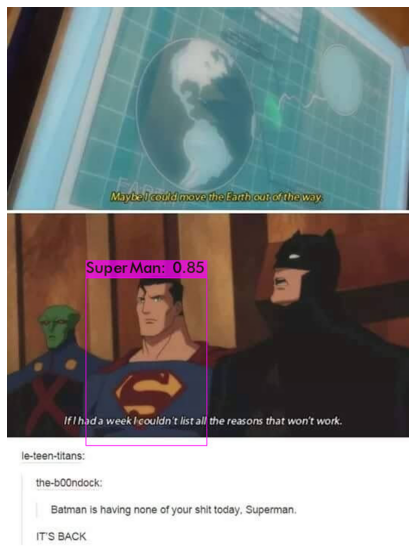

In [ ]:
imShow('predictions.jpg')

###Video Prediction

In [ ]:
%cd /content/darknet
output_video = '/content/results.avi'

!./darknet detector demo /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolov3_backup/yolov3-custom_last.weights /content/1659558207934.mp4 -dont_show -i 0 -out_filename $output_video

Streaming output truncated to the last 5000 lines.
 cvWriteFrame 
Objects:


FPS:71.4 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:71.9 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:72.2 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:71.9 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:71.0 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:70.8 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:69.8 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:72.8 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:75.4 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:

SuperMan: 48% 

FPS:77.3 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:

SuperMan: 36% 

FPS:78.8 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:

SuperMan: 26% 

FPS:79.7 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:

SuperMan: 41% 

FPS:78.0 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:

SuperMan: 26% 

FPS:79.0 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:80.2 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:81.4 	 AVG_FPS:76.8

 cvWriteFrame 
Objects:


FPS:81.7 	 AVG_FPS:76.8

 cvWrit